# Titanic Dataset — Exploratory Data Analysis (EDA)

Objective: Use visual and statistical exploration to extract insights from the Titanic dataset (train.csv and test.csv).
Tools: pandas, matplotlib, seaborn

This notebook includes summary statistics, plots (pairplot, heatmap, histograms, boxplots, scatterplots), observations, and a final summary.

In [5]:
# Imports and display settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", palette="muted")
pd.options.display.max_columns = 50

In [2]:
# Load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Quick info and descriptive stats
train.info()

train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# Key value counts
print('Sex distribution:', train['Sex'].value_counts())
print('Pclass distribution:', train['Pclass'].value_counts())
print('Embarked distribution (including NaN):', train['Embarked'].value_counts(dropna=False))


Sex distribution: Sex
male      577
female    314
Name: count, dtype: int64
Pclass distribution: Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked distribution (including NaN): Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


## Missing values and simple cleaning
Check where missing values occur and their counts. For visualization we will keep the raw missing values but note them in observations.

In [8]:
# Missing values
missing = train.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Cabin       687
Age         177
Embarked      2
dtype: int64

## Correlation heatmap
We'll inspect correlations among numerical features to find relationships with `Survived`.

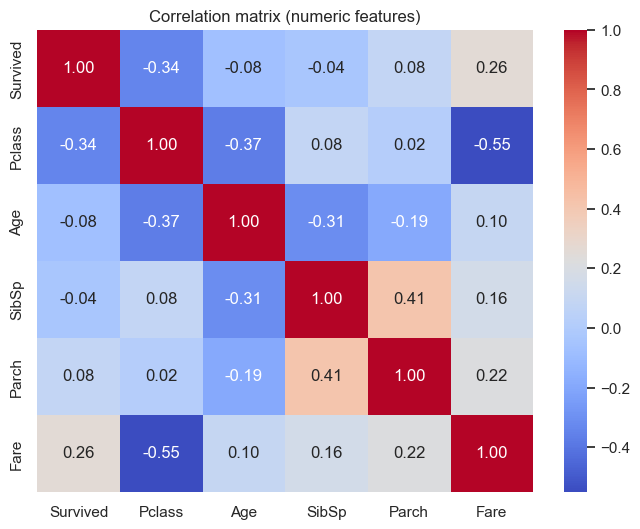

In [9]:
# Correlation matrix and heatmap
numeric_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
corr = train[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix (numeric features)')
plt.show()

Observation:
- `Pclass` and `Fare` are moderately negatively correlated (higher class -> higher fare).
- `Age` shows weak correlation with `Survived`. `Fare` and `Pclass` show some relationship to survival.

## Pairplot for numeric features (colored by Survived)
Pairplot helps visualize pairwise relationships and distributions.

Sex distribution:
 Sex
male      577
female    314
Name: count, dtype: int64

Pclass distribution:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Embarked distribution (including NaN):
 Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


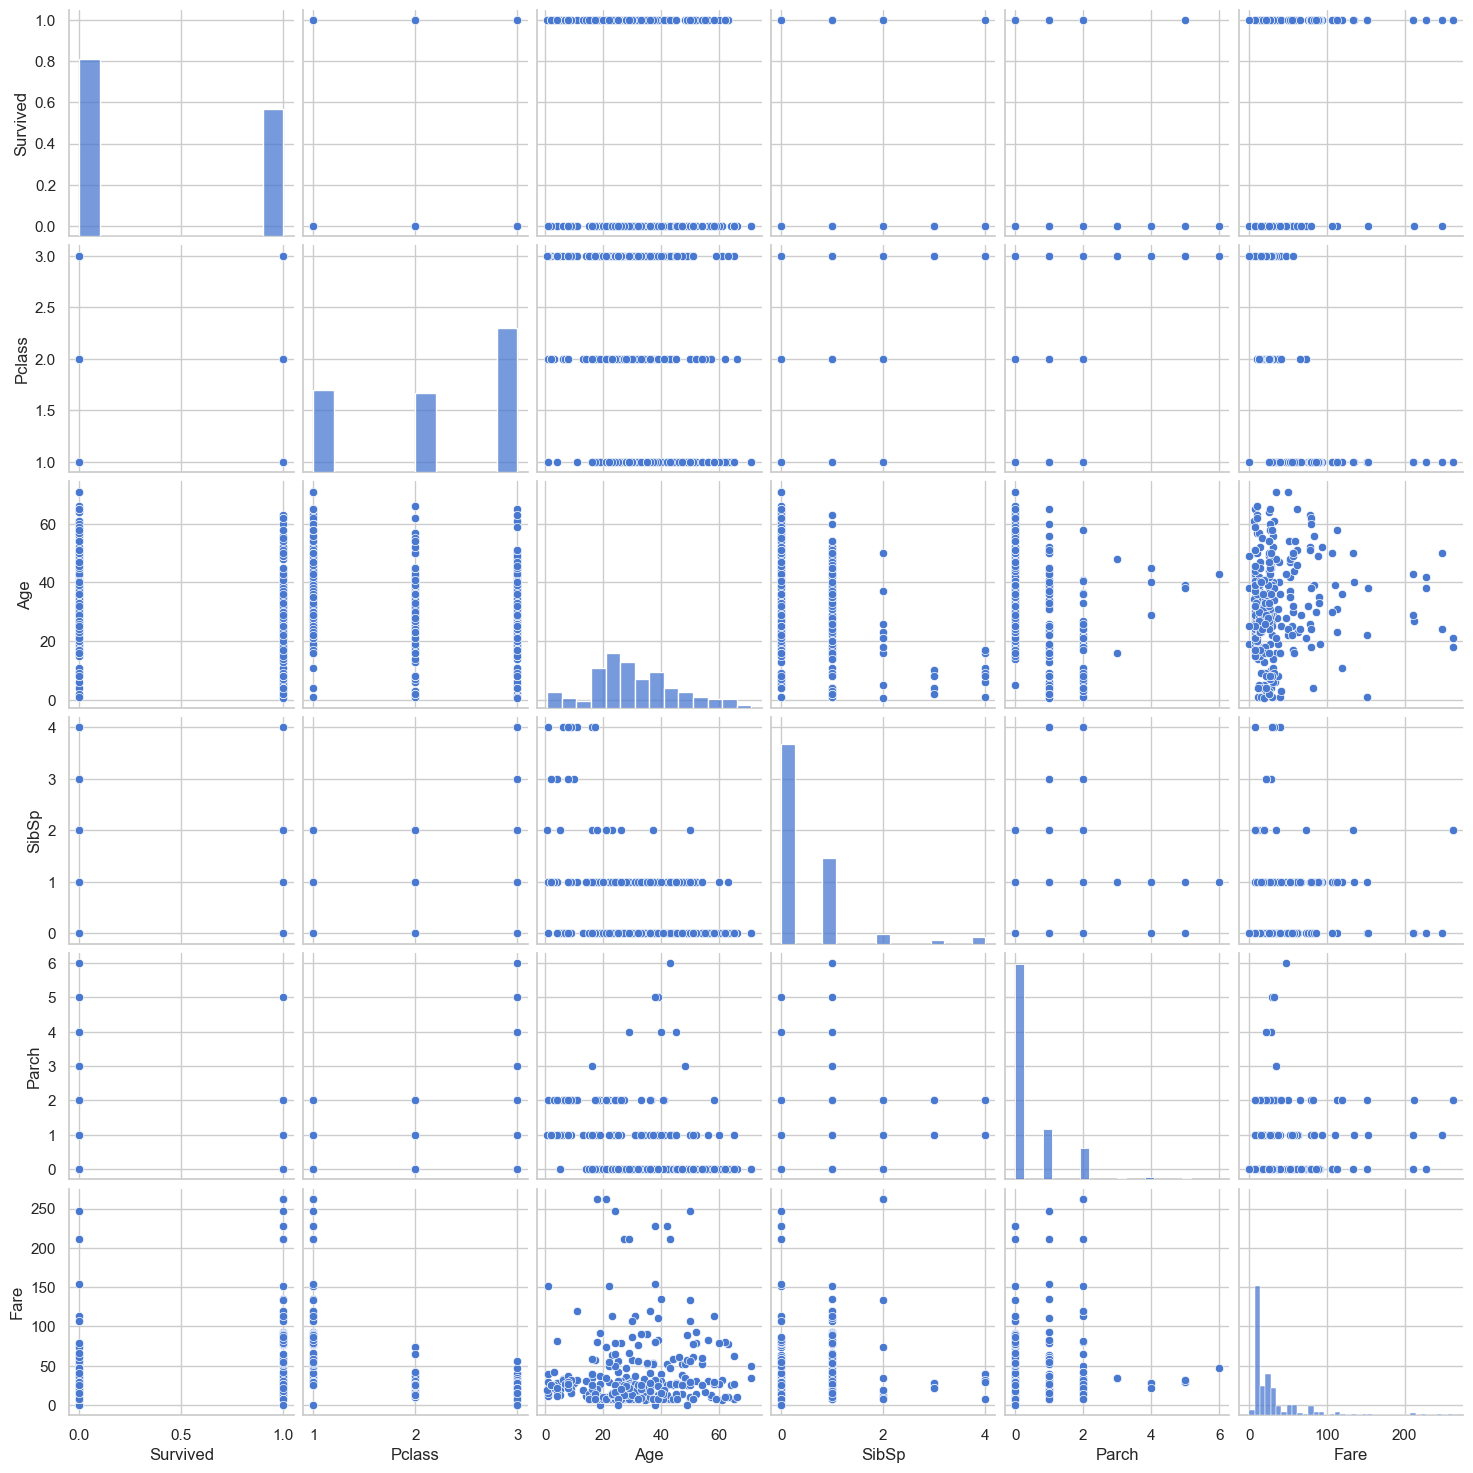

In [13]:
# Pairplot (sampled to speed up rendering if dataset is large)
sample = train.sample(frac=0.5, random_state=42)
sns.pairplot(sample[numeric_cols + ['Sex']].assign(Survived=sample['Survived']).dropna())
print('Sex distribution:\n', train['Sex'].value_counts())
print('\nPclass distribution:\n', train['Pclass'].value_counts())
print('\nEmbarked distribution (including NaN):\n', train['Embarked'].value_counts(dropna=False))